# Project Boston
Data analysis of the 2015 Boston Marathon.

Table of Contents:
1. Participants by age category
2. Percentage of runners scoring BQ times or faster
3. Relative pace for the top 5 runners
4. True pace for the top 5 runners
5. Pacing profiles by finishing time
6. What were the average finish times per age group
7. Predicting the finishing time of an athlete given their performance up to the half-marathon
8. Predicting the final marathon time given user-inputted features

Data is available from https://bit.ly/37fvOt3 and was originally scraped from https://www.baa.org/

This project is still ongoing. A more holistic analysis incorporating the 2016 and 2017 Boston marathons is coming soon. 

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
import datetime as DT
plt.style.use('fivethirtyeight')
color = '#334a58'

In [2]:
import pathlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [4]:
df15 = pd.read_csv('.\\data\\2015.csv', index_col='Overall')
df16 = pd.read_csv('.\\data\\2016.csv', index_col='Overall')
df17 = pd.read_csv('.\\data\\2016.csv', index_col='Overall')
# qualifying times in 2015
qtm15 = {'18-34':'3:03:58', '35-39':'3:08:58', '40-44':'3:13:58',
       '45-49':'3:23:58', '50-54':'3:28:58', '55-59':'3:38:58',
       '60-64':'3:53:58', '65-69':'4:08:58', '70-74':'4:23:58',
       '75-79':'4:38:58', '80+':'4:53:58'}
qtf15 = {'18-34':'3:33:58', '35-39':'3:38:58', '40-44':'3:43:58',
       '45-49':'3:53:58', '50-54':'3:58:58', '55-59':'4:08:58',
       '60-64':'4:23:58', '65-69':'4:38:58', '70-74':'4:53:58',
       '75-79':'5:08:58', '80+':'5:23:58'}

distances_conv = {'5K':5, '10K':10, '15K':15, '20K':20, '21.1K':21.1, '25K':25, '30K':30, '35K':35, '40K':40, '42.2K': 42.2}

pd.set_option('display.max_columns', None)

## Section 1 - Boston Marathon 2015 - Participants by Age Category

In [5]:
# remove excess columns
df15.drop(columns='Unnamed: 0', inplace = True)

In [6]:
df15

,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Proj Time,Official Time,Gender,Division
Overall,,,,,,,,,,,,,,,,,,,,,,,
1,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,NaN,0:14:43,0:29:43,0:44:57,1:00:29,1:04:02,1:16:07,1:32:00,1:47:59,2:02:39,0:04:56,-,2:09:17,1,1
2,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,NaN,0:14:43,0:29:43,0:44:58,1:00:28,1:04:01,1:16:07,1:31:59,1:47:59,2:02:42,0:04:58,-,2:09:48,2,2
3,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,NaN,0:14:43,0:29:43,0:44:57,1:00:29,1:04:02,1:16:07,1:32:00,1:47:59,2:03:01,0:04:59,-,2:10:22,3,3
4,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,NaN,0:14:43,0:29:44,0:45:01,1:00:29,1:04:02,1:16:07,1:32:00,1:48:03,2:03:47,0:05:00,-,2:10:47,4,4
5,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,NaN,0:14:43,0:29:44,0:44:58,1:00:28,1:04:01,1:16:07,1:32:00,1:47:59,2:03:27,0:05:00,-,2:10:49,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26594,25656,"Prescott, Francine J.",64,F,Boynton Beach,FL,USA,NaN,MI,0:50:15,1:43:31,2:36:53,3:32:26,3:43:46,4:25:53,5:19:44,6:17:19,7:13:34,0:17:31,-,7:38:56,12015,269
26595,31359,"Emerson, Annette C.",61,F,Old Town,ME,USA,NaN,NaN,0:48:36,1:39:39,2:39:13,3:35:58,3:47:55,4:32:44,5:31:58,6:28:56,7:26:19,0:17:59,-,7:51:30,12016,270
26596,25559,"Cerveny, Nona",66,F,Scottsdale,AZ,USA,NaN,NaN,0:53:03,1:47:16,2:41:45,3:37:07,3:48:21,4:33:51,5:38:56,6:38:51,7:36:18,0:18:18,-,7:59:33,12017,91


In [7]:
# function to convert a time string to a decimal minute value
# NOTE: minutes is in base 10
def timeToMins(time):
    time = time.split(':')
    if '-' in time:
        return float('NaN')
    else:
        h_min = float(time[0]) * 60
        m_min = float(time[1])
        s_min = float(time[2]) / 60
        return h_min + m_min + s_min

In [8]:
# function to convert a decimal minute value to a time string
def minsToTime(dT): # dT - decimalTime
    if math.isnan(dT):
        return dT
    else:
        hour = (dT - (dT % 60)) / 60
        shour = str(int(hour))
        sminute = '{:0>1}'.format(shour)
        minute = (dT % 60) - (dT % 1)
        sminute = str(int(minute))
        sminute = '{:0>2}'.format(sminute)
        second = round((dT % 1) * 60)
        ssecond = str(int(second))
        ssecond = '{:0>2}'.format(ssecond)
        return f'{shour}:{sminute}:{ssecond}'

In [9]:
filt = (18 <= df15['Age']) & (df15['Age'] <= 34)
df15.loc[filt]

,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Proj Time,Official Time,Gender,Division
Overall,,,,,,,,,,,,,,,,,,,,,,,
1,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,NaN,0:14:43,0:29:43,0:44:57,1:00:29,1:04:02,1:16:07,1:32:00,1:47:59,2:02:39,0:04:56,-,2:09:17,1,1
2,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,NaN,0:14:43,0:29:43,0:44:58,1:00:28,1:04:01,1:16:07,1:31:59,1:47:59,2:02:42,0:04:58,-,2:09:48,2,2
3,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,NaN,0:14:43,0:29:43,0:44:57,1:00:29,1:04:02,1:16:07,1:32:00,1:47:59,2:03:01,0:04:59,-,2:10:22,3,3
4,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,NaN,0:14:43,0:29:44,0:45:01,1:00:29,1:04:02,1:16:07,1:32:00,1:48:03,2:03:47,0:05:00,-,2:10:47,4,4
5,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,NaN,0:14:43,0:29:44,0:44:58,1:00:28,1:04:01,1:16:07,1:32:00,1:47:59,2:03:27,0:05:00,-,2:10:49,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26550,29879,"Hannon, Sarah",29,F,Quincy,MA,USA,NaN,NaN,0:35:26,1:12:06,1:50:35,2:32:39,2:41:49,3:17:48,4:04:08,4:55:03,5:42:44,0:13:53,-,6:03:51,11996,5997
26559,27458,"Thomas, Jenna",26,F,Woburn,MA,USA,NaN,NaN,0:37:38,1:12:57,1:51:06,2:36:30,2:46:43,3:27:45,4:21:50,5:04:17,5:46:53,0:13:57,-,6:05:26,12000,6000
26568,26907,"Lynch, Kathleen C.",26,F,Waltham,MA,USA,NaN,NaN,0:37:46,1:14:34,1:54:20,2:35:30,2:44:43,3:19:30,4:10:21,5:00:21,5:48:01,0:14:01,-,6:07:06,12005,6001


In [10]:
# age categories
age_groups = {18:34, 35:39, 40:44, 45:49, 50:54, 55:59, 60:64, 65:69, 70:74, 75:79}
AgeClusters = [str(age1) + '-' + str(age2) for age1, age2 in age_groups.items()]
for index, age in enumerate(age_groups):
    filt = (age <= df15['Age']) & (df15['Age'] <= age_groups[age])
    df15.loc[filt, 'AgeCluster'] = AgeClusters[index]

# 80+ age category
AgeClusters.append('80+')
df15.loc[(80 <= df15['Age']), 'AgeCluster'] = AgeClusters[10]

In [11]:
age_grp = df15.groupby(['AgeCluster'])

In [12]:
# duplicates the column
df15['QualifyTime'] = df15['AgeCluster']

In [13]:
# map the qualifying times for M/F for Boston 2015
filt = df15['M/F'] == 'M'
df15.loc[filt, 'QualifyTime'] = df15['QualifyTime'].map(qtm15)
filt = df15['M/F'] == 'F'
df15.loc[filt, 'QualifyTime'] = df15['QualifyTime'].map(qtf15)

In [14]:
df15

,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Proj Time,Official Time,Gender,Division,AgeCluster,QualifyTime
Overall,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,NaN,0:14:43,0:29:43,0:44:57,1:00:29,1:04:02,1:16:07,1:32:00,1:47:59,2:02:39,0:04:56,-,2:09:17,1,1,18-34,3:03:58
2,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,NaN,0:14:43,0:29:43,0:44:58,1:00:28,1:04:01,1:16:07,1:31:59,1:47:59,2:02:42,0:04:58,-,2:09:48,2,2,18-34,3:03:58
3,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,NaN,0:14:43,0:29:43,0:44:57,1:00:29,1:04:02,1:16:07,1:32:00,1:47:59,2:03:01,0:04:59,-,2:10:22,3,3,18-34,3:03:58
4,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,NaN,0:14:43,0:29:44,0:45:01,1:00:29,1:04:02,1:16:07,1:32:00,1:48:03,2:03:47,0:05:00,-,2:10:47,4,4,18-34,3:03:58
5,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,NaN,0:14:43,0:29:44,0:44:58,1:00:28,1:04:01,1:16:07,1:32:00,1:47:59,2:03:27,0:05:00,-,2:10:49,5,5,18-34,3:03:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26594,25656,"Prescott, Francine J.",64,F,Boynton Beach,FL,USA,NaN,MI,0:50:15,1:43:31,2:36:53,3:32:26,3:43:46,4:25:53,5:19:44,6:17:19,7:13:34,0:17:31,-,7:38:56,12015,269,60-64,4:23:58
26595,31359,"Emerson, Annette C.",61,F,Old Town,ME,USA,NaN,NaN,0:48:36,1:39:39,2:39:13,3:35:58,3:47:55,4:32:44,5:31:58,6:28:56,7:26:19,0:17:59,-,7:51:30,12016,270,60-64,4:23:58
26596,25559,"Cerveny, Nona",66,F,Scottsdale,AZ,USA,NaN,NaN,0:53:03,1:47:16,2:41:45,3:37:07,3:48:21,4:33:51,5:38:56,6:38:51,7:36:18,0:18:18,-,7:59:33,12017,91,65-69,4:38:58


In [15]:
age_grp.get_group('18-34')

,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Proj Time,Official Time,Gender,Division,AgeCluster,QualifyTime
Overall,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,NaN,0:14:43,0:29:43,0:44:57,1:00:29,1:04:02,1:16:07,1:32:00,1:47:59,2:02:39,0:04:56,-,2:09:17,1,1,18-34,3:03:58
2,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,NaN,0:14:43,0:29:43,0:44:58,1:00:28,1:04:01,1:16:07,1:31:59,1:47:59,2:02:42,0:04:58,-,2:09:48,2,2,18-34,3:03:58
3,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,NaN,0:14:43,0:29:43,0:44:57,1:00:29,1:04:02,1:16:07,1:32:00,1:47:59,2:03:01,0:04:59,-,2:10:22,3,3,18-34,3:03:58
4,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,NaN,0:14:43,0:29:44,0:45:01,1:00:29,1:04:02,1:16:07,1:32:00,1:48:03,2:03:47,0:05:00,-,2:10:47,4,4,18-34,3:03:58
5,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,NaN,0:14:43,0:29:44,0:44:58,1:00:28,1:04:01,1:16:07,1:32:00,1:47:59,2:03:27,0:05:00,-,2:10:49,5,5,18-34,3:03:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26550,29879,"Hannon, Sarah",29,F,Quincy,MA,USA,NaN,NaN,0:35:26,1:12:06,1:50:35,2:32:39,2:41:49,3:17:48,4:04:08,4:55:03,5:42:44,0:13:53,-,6:03:51,11996,5997,18-34,3:33:58
26559,27458,"Thomas, Jenna",26,F,Woburn,MA,USA,NaN,NaN,0:37:38,1:12:57,1:51:06,2:36:30,2:46:43,3:27:45,4:21:50,5:04:17,5:46:53,0:13:57,-,6:05:26,12000,6000,18-34,3:33:58
26568,26907,"Lynch, Kathleen C.",26,F,Waltham,MA,USA,NaN,NaN,0:37:46,1:14:34,1:54:20,2:35:30,2:44:43,3:19:30,4:10:21,5:00:21,5:48:01,0:14:01,-,6:07:06,12005,6001,18-34,3:33:58


In [16]:
median_age = df15['Age'].median()

In [17]:
# get number of male and female finishers by age category
males = df15['M/F'] == 'M'
females = df15['M/F'] == 'F'

malesByAge = df15.loc[males, 'AgeCluster'].value_counts()
femalesByAge = df15.loc[females, 'AgeCluster'].value_counts()
df_Participants = pd.concat([malesByAge, femalesByAge], axis ='columns', ignore_index=True)
df_Participants.rename(columns = {0:'Male Finishers', 1:'Female Finishers'}, inplace=True)
df_Participants

,Male Finishers,Female Finishers
18-34,3215,4144
45-49,2485,1832
40-44,2109,1984
50-54,2055,1206
35-39,1749,1860
55-59,1498,607
60-64,898,270
65-69,403,91
70-74,123,20
75-79,36,2


In [18]:
# get the index of age category sorted
df_Participants.sort_index(inplace=True)

In [19]:
df_Participants

,Male Finishers,Female Finishers
18-34,3215,4144
35-39,1749,1860
40-44,2109,1984
45-49,2485,1832
50-54,2055,1206
55-59,1498,607
60-64,898,270
65-69,403,91
70-74,123,20
75-79,36,2


In [20]:
df_Participants_Pct = pd.DataFrame()
totalFinishers = df_Participants.sum(axis=1)
df_Participants_Pct['Pct Male'] = (df_Participants['Male Finishers'] / totalFinishers) * 100
df_Participants_Pct['Pct Female'] = (df_Participants['Female Finishers'] / totalFinishers) * 100
df_Participants_Pct

,Pct Male,Pct Female
18-34,43.688001,56.311999
35-39,48.462178,51.537822
40-44,51.526997,48.473003
45-49,57.563123,42.436877
50-54,63.017479,36.982521
55-59,71.163895,28.836105
60-64,76.883562,23.116438
65-69,81.578947,18.421053
70-74,86.013986,13.986014
75-79,94.736842,5.263158


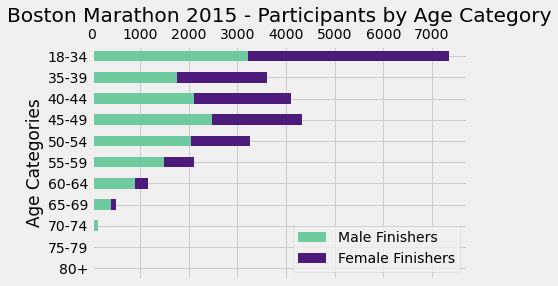

In [21]:
ax = df_Participants.plot.barh(stacked=True, color=['#6fcb9f','#4d1b7b'])
ax.invert_yaxis()
ax.xaxis.tick_top()
plt.title('Boston Marathon 2015 - Participants by Age Category')
plt.ylabel('Age Categories')
plt.legend(loc='lower right')
plt.show()

* As expected, the majority of participants hail from the 18-34 age category.
* Women take up the majority of the 18-34 age cohort, making up 56% of this category.
* The proportion of women in the marathon remain somewhat steady from 56.3% at 18-34 to 42.43% at 45-49. In the 50+ age group, the proportion of men in the marathon takes a greater presence from 63.0% at ages of 50-54 to 86.0% at ages of 70-74. Further age groups become less reliable as the sample size diminishes.
* Note that the above metrics may be accurate for the 2015 Boston Marathon but is not an comprehensive indication of past and future Boston Marathons.

## Section 2 - Boston Marathon 2015 - Percentage of runners scoring BQ times or faster

In [22]:
df15['AgeCluster'].value_counts()

18-34    7359
45-49    4317
40-44    4093
35-39    3609
50-54    3261
55-59    2105
60-64    1168
65-69     494
70-74     143
75-79      38
80+        11
Name: AgeCluster, dtype: int64

In [23]:
df15['Official MTime'] = df15['Official Time'].apply(lambda x: timeToMins(x))
df15['Qualify MTime'] = df15['QualifyTime'].apply(lambda x: timeToMins(x))

In [24]:
# median/mean times per age group in minutes
age_grp['Official MTime'].agg(['median', 'mean'])

,median,mean
AgeCluster,,
18-34,209.550000,219.247556
35-39,211.633333,218.169142
40-44,217.450000,222.454349
45-49,220.733333,225.945923
50-54,224.816667,231.133717
55-59,231.816667,238.632494
60-64,244.800000,251.107277
65-69,260.366667,266.902429
70-74,275.566667,280.142308


In [25]:
# filter by faster than BQ and gender
beatBQM = (df15['Official MTime'] < df15['Qualify MTime']) & (df15['M/F'] == 'M')
beatBQF = (df15['Official MTime'] < df15['Qualify MTime']) & (df15['M/F'] == 'F')

# group by age group and the above filters
BQMage_grp = df15.loc[beatBQM].groupby(['AgeCluster'])
BQFage_grp = df15.loc[beatBQF].groupby(['AgeCluster'])

In [26]:
df15.loc[beatBQM, 'Official MTime'].median()

185.45833333333331

In [27]:
df15.loc[beatBQM]

,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Proj Time,Official Time,Gender,Division,AgeCluster,QualifyTime,Official MTime,Qualify MTime
Overall,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,NaN,0:14:43,0:29:43,0:44:57,1:00:29,1:04:02,1:16:07,1:32:00,1:47:59,2:02:39,0:04:56,-,2:09:17,1,1,18-34,3:03:58,129.283333,183.966667
2,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,NaN,0:14:43,0:29:43,0:44:58,1:00:28,1:04:01,1:16:07,1:31:59,1:47:59,2:02:42,0:04:58,-,2:09:48,2,2,18-34,3:03:58,129.800000,183.966667
3,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,NaN,0:14:43,0:29:43,0:44:57,1:00:29,1:04:02,1:16:07,1:32:00,1:47:59,2:03:01,0:04:59,-,2:10:22,3,3,18-34,3:03:58,130.366667,183.966667
4,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,NaN,0:14:43,0:29:44,0:45:01,1:00:29,1:04:02,1:16:07,1:32:00,1:48:03,2:03:47,0:05:00,-,2:10:47,4,4,18-34,3:03:58,130.783333,183.966667
5,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,NaN,0:14:43,0:29:44,0:44:58,1:00:28,1:04:01,1:16:07,1:32:00,1:47:59,2:03:27,0:05:00,-,2:10:49,5,5,18-34,3:03:58,130.816667,183.966667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22646,25343,"Schleisman, Jim T",81,M,Jefferson,IA,USA,NaN,NaN,0:28:56,0:58:11,1:28:20,1:59:24,2:06:14,2:31:07,3:04:02,3:37:42,4:11:24,0:10:11,-,4:26:49,12841,3,80+,4:53:58,266.816667,293.966667
22880,25447,"Kwan, Peter",77,M,Edmonton,AB,CAN,NaN,NaN,0:28:57,0:59:43,1:31:17,2:03:49,2:10:45,2:35:50,3:08:59,3:42:27,4:14:50,0:10:17,-,4:29:26,12959,12,75-79,4:38:58,269.433333,278.966667
22950,25379,"Kelly, Frank",76,M,Saint John,NB,CAN,NaN,NaN,0:28:57,0:58:18,1:28:38,1:59:47,2:06:49,2:34:05,3:07:13,3:41:29,4:15:26,0:10:19,-,4:30:06,12993,13,75-79,4:38:58,270.100000,278.966667


In [28]:
# total number of finishers
tot = age_grp['Name'].count()

# number of male BQ finishers
BQM = BQMage_grp['Name'].count()

# number of female BQ finishers
BQF = BQFage_grp['Name'].count()

# new dataframe with all the finisher numbers
# concatenated along the column axis
# ignore "Name" index
df_MF = pd.concat([BQM, BQF, tot], axis='columns', ignore_index=True)

# rename ignore_index default column names
df_MF.rename(columns = {0:'MaleBQ', 1:'FemaleBQ', 2:'TotalFinishers'}, inplace=True)

# create columns for percentage of BQers from each gender
df_MF['MaleBQPct'] = (df_MF['MaleBQ']/df_MF['TotalFinishers'])
df_MF['FemaleBQPct'] = (df_MF['FemaleBQ']/df_MF['TotalFinishers'])

# new dataframe for percentage series 
df_MFPct = pd.concat([df_MF['MaleBQPct'],  df_MF['FemaleBQPct']], axis='columns')

In [29]:
df_MF

,MaleBQ,FemaleBQ,TotalFinishers,MaleBQPct,FemaleBQPct
18-34,1627,1772.0,7359,0.221090,0.240794
35-39,860,862.0,3609,0.238293,0.238847
40-44,954,851.0,4093,0.233081,0.207916
45-49,1186,905.0,4317,0.274728,0.209636
50-54,857,595.0,3261,0.262803,0.182459
55-59,630,291.0,2105,0.299287,0.138242
60-64,368,140.0,1168,0.315068,0.119863
65-69,171,41.0,494,0.346154,0.082996
70-74,47,11.0,143,0.328671,0.076923
75-79,15,2.0,38,0.394737,0.052632


In [30]:
df_MFPct

,MaleBQPct,FemaleBQPct
18-34,0.221090,0.240794
35-39,0.238293,0.238847
40-44,0.233081,0.207916
45-49,0.274728,0.209636
50-54,0.262803,0.182459
55-59,0.299287,0.138242
60-64,0.315068,0.119863
65-69,0.346154,0.082996
70-74,0.328671,0.076923
75-79,0.394737,0.052632


In [31]:
OverallPctBQ= ((df_MF[['MaleBQ', 'FemaleBQ']].sum().sum()) / df_MF['TotalFinishers'].sum()) * 100
print(f'The overall percentage of BQers this marathon was {round(OverallPctBQ, 2)}%')

The overall percentage of BQers this marathon was 45.82%


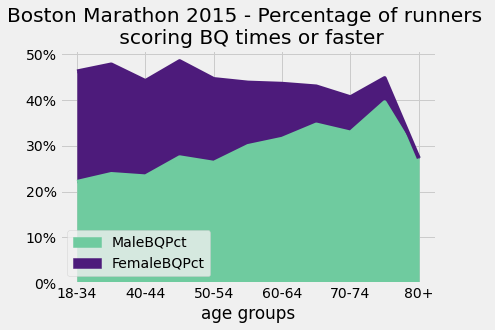

In [32]:
ax = df_MFPct.plot.area(color=['#6fcb9f','#4d1b7b'])
plt.legend()
plt.title('Boston Marathon 2015 - Percentage of runners \n scoring BQ times or faster')
# xmax refers to the multiplication factor in the % equation
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
plt.xlabel('age groups')
plt.show()

* Surprisingly, rountinely ***less than half*** of Boston marathon runners score a time at or below their Boston qualifying time or put more bluntly, a marathon time they have proven to have been able to run in the recent past (about two and a half years prior). This is interesting since Boston is among the most venerated US marathons aside from the Olympic trials because of their implementation of a qualifying time criteria, meaning most runners (except those running for the BAA's offical charities) have had to earn their participation at Boston.
* However, the Boston Marathon qualifying times seem to have had an even effect on each age, with between 40-50% of runners from each age group running a Boston qualifying time in the 2015 Boston Marathon before the ages of 70 and above (which may be skewed by a low sample size).
<b/>

**Factors affecting this outcome could be related to:**
* *Lack of Enthusiasm*: Often running a Boston qualifying time could be a fulfilling enough achievement for a runner, with the actual race serving as somewhat of a "victory lap". This can also feed into subpar training prior to the Boston Marathon, where individuals are less motivated to put in the work to run a PR at Boston.
* *Poor Weather*: The weather on April 20, 2015, the date when the 2015 Boston Marathon took place was cold and rainy. Temperature were between 4 and 7 degrees celsius. This could have put a damper on the performance of all runners, especially those who were ill accustomed to running in wet and chilly conditions.
* *Unfamiliar Course*: The course for the Boston marathon is especially tricky for first time runners given that it starts at elevation, about 490 feet (149.3m) above sea level and runs downhill until mile 9, where the running surface is only 10 (3m) feet above the coast. Proper pacing would have been challenging as runners may have been tempted to be too ambitous off the starting corrals and into a downhill. After about 20 miles, runners encounter what is famously known as heartbreak hill which although only has 17 feet (5.18m) of elevation gain, has an grueling 3.3% elevation grade, steeper than the hills of Chicago, LA, and NYC marathons. At this point in the race, runners will have likely endured a carbohydrate deficit (otherwise known as "bonking" or "hitting-the-wall"), meaning that most runners will slow at this distance.

## Section 3 - Boston Marathon 2015 - Relative Pace for the Top 5 Runners

In [33]:
# rename split checkpoints to numeric distances

df15.rename(columns={'Half':'21.1K', 'Official Time':'42.2K'}, inplace=True)
df15.rename(columns={'Pace':'Pace (mi/min)'}, inplace=True)

In [34]:
df15

,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,5K,10K,15K,20K,21.1K,25K,30K,35K,40K,Pace (mi/min),Proj Time,42.2K,Gender,Division,AgeCluster,QualifyTime,Official MTime,Qualify MTime
Overall,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,NaN,0:14:43,0:29:43,0:44:57,1:00:29,1:04:02,1:16:07,1:32:00,1:47:59,2:02:39,0:04:56,-,2:09:17,1,1,18-34,3:03:58,129.283333,183.966667
2,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,NaN,0:14:43,0:29:43,0:44:58,1:00:28,1:04:01,1:16:07,1:31:59,1:47:59,2:02:42,0:04:58,-,2:09:48,2,2,18-34,3:03:58,129.800000,183.966667
3,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,NaN,0:14:43,0:29:43,0:44:57,1:00:29,1:04:02,1:16:07,1:32:00,1:47:59,2:03:01,0:04:59,-,2:10:22,3,3,18-34,3:03:58,130.366667,183.966667
4,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,NaN,0:14:43,0:29:44,0:45:01,1:00:29,1:04:02,1:16:07,1:32:00,1:48:03,2:03:47,0:05:00,-,2:10:47,4,4,18-34,3:03:58,130.783333,183.966667
5,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,NaN,0:14:43,0:29:44,0:44:58,1:00:28,1:04:01,1:16:07,1:32:00,1:47:59,2:03:27,0:05:00,-,2:10:49,5,5,18-34,3:03:58,130.816667,183.966667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26594,25656,"Prescott, Francine J.",64,F,Boynton Beach,FL,USA,NaN,MI,0:50:15,1:43:31,2:36:53,3:32:26,3:43:46,4:25:53,5:19:44,6:17:19,7:13:34,0:17:31,-,7:38:56,12015,269,60-64,4:23:58,458.933333,263.966667
26595,31359,"Emerson, Annette C.",61,F,Old Town,ME,USA,NaN,NaN,0:48:36,1:39:39,2:39:13,3:35:58,3:47:55,4:32:44,5:31:58,6:28:56,7:26:19,0:17:59,-,7:51:30,12016,270,60-64,4:23:58,471.500000,263.966667
26596,25559,"Cerveny, Nona",66,F,Scottsdale,AZ,USA,NaN,NaN,0:53:03,1:47:16,2:41:45,3:37:07,3:48:21,4:33:51,5:38:56,6:38:51,7:36:18,0:18:18,-,7:59:33,12017,91,65-69,4:38:58,479.550000,278.966667


In [35]:
# create col_labels array from df15 which includes the distances at which runner splits were measured

col_labels = df15.columns.values[9:18]
col_labels = np.append(col_labels, df15.columns[20])
col_labels

array(['5K', '10K', '15K', '20K', '21.1K', '25K', '30K', '35K', '40K',
       '42.2K'], dtype=object)

In [36]:
# create dfT15 dataframe will all split distance data converted to minutes in base 10

dfT15 = pd.DataFrame()
for label in col_labels:
    dfT15[label] = df15[label].apply(lambda x: timeToMins(x))

In [37]:
dfT15

,5K,10K,15K,20K,21.1K,25K,30K,35K,40K,42.2K
Overall,,,,,,,,,,
1,14.716667,29.716667,44.950000,60.483333,64.033333,76.116667,92.000000,107.983333,122.650000,129.283333
2,14.716667,29.716667,44.966667,60.466667,64.016667,76.116667,91.983333,107.983333,122.700000,129.800000
3,14.716667,29.716667,44.950000,60.483333,64.033333,76.116667,92.000000,107.983333,123.016667,130.366667
4,14.716667,29.733333,45.016667,60.483333,64.033333,76.116667,92.000000,108.050000,123.783333,130.783333
5,14.716667,29.733333,44.966667,60.466667,64.016667,76.116667,92.000000,107.983333,123.450000,130.816667
...,...,...,...,...,...,...,...,...,...,...
26594,50.250000,103.516667,156.883333,212.433333,223.766667,265.883333,319.733333,377.316667,433.566667,458.933333
26595,48.600000,99.650000,159.216667,215.966667,227.916667,272.733333,331.966667,388.933333,446.316667,471.500000
26596,53.050000,107.266667,161.750000,217.116667,228.350000,273.850000,338.933333,398.850000,456.300000,479.550000


In [38]:
# create GP or "Global Pace" columns based the athlete's overall pace at each distance checkpoint

for column in dfT15.columns.values:
    dfT15[f'{column}-GP'] = dfT15[column] / distances_conv[column]

In [39]:
dfT15

,5K,10K,15K,20K,21.1K,25K,30K,35K,40K,42.2K,5K-GP,10K-GP,15K-GP,20K-GP,21.1K-GP,25K-GP,30K-GP,35K-GP,40K-GP,42.2K-GP
Overall,,,,,,,,,,,,,,,,,,,,
1,14.716667,29.716667,44.950000,60.483333,64.033333,76.116667,92.000000,107.983333,122.650000,129.283333,2.943333,2.971667,2.996667,3.024167,3.034755,3.044667,3.066667,3.085238,3.066250,3.063586
2,14.716667,29.716667,44.966667,60.466667,64.016667,76.116667,91.983333,107.983333,122.700000,129.800000,2.943333,2.971667,2.997778,3.023333,3.033965,3.044667,3.066111,3.085238,3.067500,3.075829
3,14.716667,29.716667,44.950000,60.483333,64.033333,76.116667,92.000000,107.983333,123.016667,130.366667,2.943333,2.971667,2.996667,3.024167,3.034755,3.044667,3.066667,3.085238,3.075417,3.089258
4,14.716667,29.733333,45.016667,60.483333,64.033333,76.116667,92.000000,108.050000,123.783333,130.783333,2.943333,2.973333,3.001111,3.024167,3.034755,3.044667,3.066667,3.087143,3.094583,3.099131
5,14.716667,29.733333,44.966667,60.466667,64.016667,76.116667,92.000000,107.983333,123.450000,130.816667,2.943333,2.973333,2.997778,3.023333,3.033965,3.044667,3.066667,3.085238,3.086250,3.099921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26594,50.250000,103.516667,156.883333,212.433333,223.766667,265.883333,319.733333,377.316667,433.566667,458.933333,10.050000,10.351667,10.458889,10.621667,10.605055,10.635333,10.657778,10.780476,10.839167,10.875197
26595,48.600000,99.650000,159.216667,215.966667,227.916667,272.733333,331.966667,388.933333,446.316667,471.500000,9.720000,9.965000,10.614444,10.798333,10.801738,10.909333,11.065556,11.112381,11.157917,11.172986
26596,53.050000,107.266667,161.750000,217.116667,228.350000,273.850000,338.933333,398.850000,456.300000,479.550000,10.610000,10.726667,10.783333,10.855833,10.822275,10.954000,11.297778,11.395714,11.407500,11.363744


In [40]:
# use the global pace at 5K as the interval pace during the "0-5K" stretch

dfT15['0K-5K'] = dfT15['5K-GP']

In [41]:
# calculate the interval pace between each split measurement checkpoint

distanceMarkers = list(dfT15.columns.values[:10])
print(distanceMarkers)


for col_index in range(len(distanceMarkers) - 1):
    checkpoint_2 = distanceMarkers[col_index + 1]
    checkpoint_1 = distanceMarkers[col_index]
    
    
    distance = distances_conv[checkpoint_2] - distances_conv[checkpoint_1]
    distance = round(distance, 4)
    time = dfT15[checkpoint_2] - dfT15[checkpoint_1]
    
    
    dfT15[f'{checkpoint_1}-{checkpoint_2}'] = time / distance

['5K', '10K', '15K', '20K', '21.1K', '25K', '30K', '35K', '40K', '42.2K']


In [42]:
dfT15

,5K,10K,15K,20K,21.1K,25K,30K,35K,40K,42.2K,5K-GP,10K-GP,15K-GP,20K-GP,21.1K-GP,25K-GP,30K-GP,35K-GP,40K-GP,42.2K-GP,0K-5K,5K-10K,10K-15K,15K-20K,20K-21.1K,21.1K-25K,25K-30K,30K-35K,35K-40K,40K-42.2K
Overall,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,14.716667,29.716667,44.950000,60.483333,64.033333,76.116667,92.000000,107.983333,122.650000,129.283333,2.943333,2.971667,2.996667,3.024167,3.034755,3.044667,3.066667,3.085238,3.066250,3.063586,2.943333,3.000000,3.046667,3.106667,3.227273,3.098291,3.176667,3.196667,2.933333,3.015152
2,14.716667,29.716667,44.966667,60.466667,64.016667,76.116667,91.983333,107.983333,122.700000,129.800000,2.943333,2.971667,2.997778,3.023333,3.033965,3.044667,3.066111,3.085238,3.067500,3.075829,2.943333,3.000000,3.050000,3.100000,3.227273,3.102564,3.173333,3.200000,2.943333,3.227273
3,14.716667,29.716667,44.950000,60.483333,64.033333,76.116667,92.000000,107.983333,123.016667,130.366667,2.943333,2.971667,2.996667,3.024167,3.034755,3.044667,3.066667,3.085238,3.075417,3.089258,2.943333,3.000000,3.046667,3.106667,3.227273,3.098291,3.176667,3.196667,3.006667,3.340909
4,14.716667,29.733333,45.016667,60.483333,64.033333,76.116667,92.000000,108.050000,123.783333,130.783333,2.943333,2.973333,3.001111,3.024167,3.034755,3.044667,3.066667,3.087143,3.094583,3.099131,2.943333,3.003333,3.056667,3.093333,3.227273,3.098291,3.176667,3.210000,3.146667,3.181818
5,14.716667,29.733333,44.966667,60.466667,64.016667,76.116667,92.000000,107.983333,123.450000,130.816667,2.943333,2.973333,2.997778,3.023333,3.033965,3.044667,3.066667,3.085238,3.086250,3.099921,2.943333,3.003333,3.046667,3.100000,3.227273,3.102564,3.176667,3.196667,3.093333,3.348485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26594,50.250000,103.516667,156.883333,212.433333,223.766667,265.883333,319.733333,377.316667,433.566667,458.933333,10.050000,10.351667,10.458889,10.621667,10.605055,10.635333,10.657778,10.780476,10.839167,10.875197,10.050000,10.653333,10.673333,11.110000,10.303030,10.799145,10.770000,11.516667,11.250000,11.530303
26595,48.600000,99.650000,159.216667,215.966667,227.916667,272.733333,331.966667,388.933333,446.316667,471.500000,9.720000,9.965000,10.614444,10.798333,10.801738,10.909333,11.065556,11.112381,11.157917,11.172986,9.720000,10.210000,11.913333,11.350000,10.863636,11.491453,11.846667,11.393333,11.476667,11.446970
26596,53.050000,107.266667,161.750000,217.116667,228.350000,273.850000,338.933333,398.850000,456.300000,479.550000,10.610000,10.726667,10.783333,10.855833,10.822275,10.954000,11.297778,11.395714,11.407500,11.363744,10.610000,10.843333,10.896667,11.073333,10.212121,11.666667,13.016667,11.983333,11.490000,10.568182


In [43]:
# create an array of distance intervals (PS: Pace Segment)

PS = dfT15.columns.values[20:]
PS

array(['0K-5K', '5K-10K', '10K-15K', '15K-20K', '20K-21.1K', '21.1K-25K',
       '25K-30K', '30K-35K', '35K-40K', '40K-42.2K'], dtype=object)

In [44]:
# create a pace segment dataframe, extracting the Pace Segments from dfT15

dfPS15 = pd.DataFrame(index=df15.index)
for column in PS:
    dfPS15[column] = dfT15[column]

In [45]:
dfPS15.shape

(26598, 10)

In [46]:
# Adding in a pace column

dfPS15['Pace'] = dfT15['42.2K-GP']

In [47]:
dfPS15

,0K-5K,5K-10K,10K-15K,15K-20K,20K-21.1K,21.1K-25K,25K-30K,30K-35K,35K-40K,40K-42.2K,Pace
Overall,,,,,,,,,,,
1,2.943333,3.000000,3.046667,3.106667,3.227273,3.098291,3.176667,3.196667,2.933333,3.015152,3.063586
2,2.943333,3.000000,3.050000,3.100000,3.227273,3.102564,3.173333,3.200000,2.943333,3.227273,3.075829
3,2.943333,3.000000,3.046667,3.106667,3.227273,3.098291,3.176667,3.196667,3.006667,3.340909,3.089258
4,2.943333,3.003333,3.056667,3.093333,3.227273,3.098291,3.176667,3.210000,3.146667,3.181818,3.099131
5,2.943333,3.003333,3.046667,3.100000,3.227273,3.102564,3.176667,3.196667,3.093333,3.348485,3.099921
...,...,...,...,...,...,...,...,...,...,...,...
26594,10.050000,10.653333,10.673333,11.110000,10.303030,10.799145,10.770000,11.516667,11.250000,11.530303,10.875197
26595,9.720000,10.210000,11.913333,11.350000,10.863636,11.491453,11.846667,11.393333,11.476667,11.446970,11.172986
26596,10.610000,10.843333,10.896667,11.073333,10.212121,11.666667,13.016667,11.983333,11.490000,10.568182,11.363744


In [48]:
# Create a dfPS15 ratio dataframe which divides the pace (in minutes/base 10) during each segment of the course by the
# global (overall) pace at the end of the race, giving us the relative pace during each segment

dfPS15rat = pd.DataFrame()
columns = dfPS15.columns.values[0:-1]
for column in columns:
    dfPS15rat[column] = dfPS15[column] / dfPS15['Pace']

In [49]:
dfPS15rat

,0K-5K,5K-10K,10K-15K,15K-20K,20K-21.1K,21.1K-25K,25K-30K,30K-35K,35K-40K,40K-42.2K
Overall,,,,,,,,,,
1,0.960748,0.979245,0.994477,1.014062,1.053430,1.011328,1.036911,1.043439,0.957484,0.984190
2,0.956923,0.975347,0.991602,1.007858,1.049237,1.008692,1.031700,1.040370,0.956923,1.049237
3,0.952764,0.971107,0.986213,1.005635,1.044676,1.002924,1.028295,1.034769,0.973265,1.081460
4,0.949729,0.969089,0.986298,0.998129,1.041348,0.999729,1.025018,1.035774,1.015338,1.026681
5,0.949487,0.968842,0.982821,1.000025,1.041082,1.000853,1.024757,1.031209,0.997875,1.080184
...,...,...,...,...,...,...,...,...,...,...
26594,0.924121,0.979599,0.981438,1.021591,0.947388,0.993007,0.990327,1.058985,1.034464,1.060238
26595,0.869955,0.913811,1.066262,1.015843,0.972313,1.028503,1.060296,1.019721,1.027180,1.024522
26596,0.933671,0.954204,0.958898,0.974444,0.898658,1.026657,1.145456,1.054523,1.011110,0.929991


In [50]:
# insert athlete name column and set it as our index

dfPS15rat['Name'] = df15['Name']
dfPS15rat.set_index('Name', inplace=True)

In [51]:
dfPS15rat

,0K-5K,5K-10K,10K-15K,15K-20K,20K-21.1K,21.1K-25K,25K-30K,30K-35K,35K-40K,40K-42.2K
Name,,,,,,,,,,
"Desisa, Lelisa",0.960748,0.979245,0.994477,1.014062,1.053430,1.011328,1.036911,1.043439,0.957484,0.984190
"Tsegay, Yemane Adhane",0.956923,0.975347,0.991602,1.007858,1.049237,1.008692,1.031700,1.040370,0.956923,1.049237
"Chebet, Wilson",0.952764,0.971107,0.986213,1.005635,1.044676,1.002924,1.028295,1.034769,0.973265,1.081460
"Kipyego, Bernard",0.949729,0.969089,0.986298,0.998129,1.041348,0.999729,1.025018,1.035774,1.015338,1.026681
"Korir, Wesley",0.949487,0.968842,0.982821,1.000025,1.041082,1.000853,1.024757,1.031209,0.997875,1.080184
...,...,...,...,...,...,...,...,...,...,...
"Prescott, Francine J.",0.924121,0.979599,0.981438,1.021591,0.947388,0.993007,0.990327,1.058985,1.034464,1.060238
"Emerson, Annette C.",0.869955,0.913811,1.066262,1.015843,0.972313,1.028503,1.060296,1.019721,1.027180,1.024522
"Cerveny, Nona",0.933671,0.954204,0.958898,0.974444,0.898658,1.026657,1.145456,1.054523,1.011110,0.929991


In [52]:
# Create a filtered down dataframe of just the top 5 athletes called T5Paces

T5Paces = dfPS15rat.head()

In [53]:
T5Paces

,0K-5K,5K-10K,10K-15K,15K-20K,20K-21.1K,21.1K-25K,25K-30K,30K-35K,35K-40K,40K-42.2K
Name,,,,,,,,,,
"Desisa, Lelisa",0.960748,0.979245,0.994477,1.014062,1.053430,1.011328,1.036911,1.043439,0.957484,0.984190
"Tsegay, Yemane Adhane",0.956923,0.975347,0.991602,1.007858,1.049237,1.008692,1.031700,1.040370,0.956923,1.049237
"Chebet, Wilson",0.952764,0.971107,0.986213,1.005635,1.044676,1.002924,1.028295,1.034769,0.973265,1.081460
"Kipyego, Bernard",0.949729,0.969089,0.986298,0.998129,1.041348,0.999729,1.025018,1.035774,1.015338,1.026681
"Korir, Wesley",0.949487,0.968842,0.982821,1.000025,1.041082,1.000853,1.024757,1.031209,0.997875,1.080184


In [54]:
# Tranpose T5Paces

TT5Paces = T5Paces.T
TT5Paces.index.name = 'Distances'
TT5Paces

Name,"Desisa, Lelisa","Tsegay, Yemane Adhane","Chebet, Wilson","Kipyego, Bernard","Korir, Wesley"
Distances,,,,,
0K-5K,0.960748,0.956923,0.952764,0.949729,0.949487
5K-10K,0.979245,0.975347,0.971107,0.969089,0.968842
10K-15K,0.994477,0.991602,0.986213,0.986298,0.982821
15K-20K,1.014062,1.007858,1.005635,0.998129,1.000025
20K-21.1K,1.053430,1.049237,1.044676,1.041348,1.041082
21.1K-25K,1.011328,1.008692,1.002924,0.999729,1.000853
25K-30K,1.036911,1.031700,1.028295,1.025018,1.024757
30K-35K,1.043439,1.040370,1.034769,1.035774,1.031209
35K-40K,0.957484,0.956923,0.973265,1.015338,0.997875


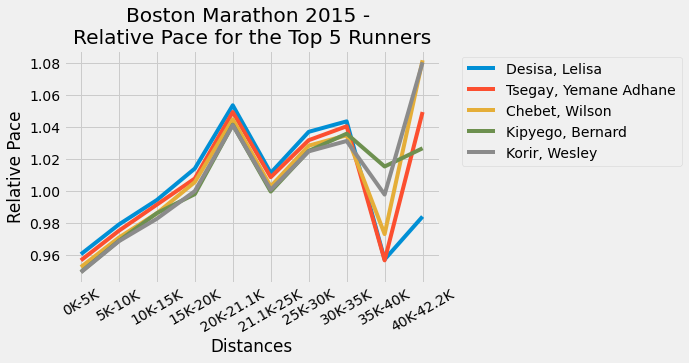

In [55]:
# Create Plot

ax = TT5Paces.plot(kind='line')
runners, distances = T5Paces.shape
plt.xticks(np.arange(10), list(TT5Paces.index), rotation = 30)
plt.ylabel('Relative Pace')
plt.title('Boston Marathon 2015 - \nRelative Pace for the Top 5 Runners')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

## Section 4 - Boston Marathon 2015 - True Pace for the Top 5 Runners

In [56]:
T5TruePaces = dfPS15
T5TruePaces.set_index(dfPS15rat.index, inplace=True)
T5TruePaces = T5TruePaces.head()
T5TruePaces = T5TruePaces.drop('Pace', axis=1)
T5TruePaces

,0K-5K,5K-10K,10K-15K,15K-20K,20K-21.1K,21.1K-25K,25K-30K,30K-35K,35K-40K,40K-42.2K
Name,,,,,,,,,,
"Desisa, Lelisa",2.943333,3.000000,3.046667,3.106667,3.227273,3.098291,3.176667,3.196667,2.933333,3.015152
"Tsegay, Yemane Adhane",2.943333,3.000000,3.050000,3.100000,3.227273,3.102564,3.173333,3.200000,2.943333,3.227273
"Chebet, Wilson",2.943333,3.000000,3.046667,3.106667,3.227273,3.098291,3.176667,3.196667,3.006667,3.340909
"Kipyego, Bernard",2.943333,3.003333,3.056667,3.093333,3.227273,3.098291,3.176667,3.210000,3.146667,3.181818
"Korir, Wesley",2.943333,3.003333,3.046667,3.100000,3.227273,3.102564,3.176667,3.196667,3.093333,3.348485


In [57]:
# Tranpose T5TruePaces

T5TruePaces = T5TruePaces.T
T5TruePaces.index.name = 'Distances'
T5TruePaces

Name,"Desisa, Lelisa","Tsegay, Yemane Adhane","Chebet, Wilson","Kipyego, Bernard","Korir, Wesley"
Distances,,,,,
0K-5K,2.943333,2.943333,2.943333,2.943333,2.943333
5K-10K,3.000000,3.000000,3.000000,3.003333,3.003333
10K-15K,3.046667,3.050000,3.046667,3.056667,3.046667
15K-20K,3.106667,3.100000,3.106667,3.093333,3.100000
20K-21.1K,3.227273,3.227273,3.227273,3.227273,3.227273
21.1K-25K,3.098291,3.102564,3.098291,3.098291,3.102564
25K-30K,3.176667,3.173333,3.176667,3.176667,3.176667
30K-35K,3.196667,3.200000,3.196667,3.210000,3.196667
35K-40K,2.933333,2.943333,3.006667,3.146667,3.093333


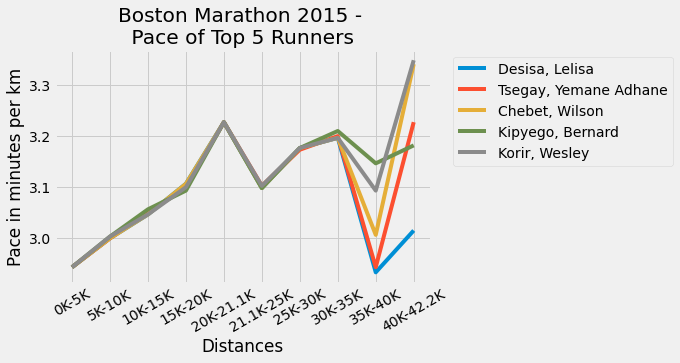

In [58]:
# Create plot

ax = T5TruePaces.plot(kind='line')
distances, runners = T5TruePaces.shape
plt.xticks(np.arange(10), list(TT5Paces.index), rotation = 30)
plt.ylabel('Pace in minutes per km')
plt.title('Boston Marathon 2015 - \n Pace of Top 5 Runners ')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

## Section 5 - Boston Marathon 2015 - Pacing Profile by Finishing Time

In [59]:
Sub3 = df15['Official MTime'] < timeToMins('3:00:00')
Bet35 = (timeToMins('3:00:00') <= df15['Official MTime']) & (df15['Official MTime'] <= timeToMins('5:00:00'))
Over5 = df15['Official MTime'] > timeToMins('5:00:00')

placeSub3, _ = df15[Sub3].shape
placeBet35, _ = df15[Bet35].shape
placeOver5, _ = df15[Over5].shape
total, _ = df15.shape

def getpct(num):
    return num / total * 100
print(f'Number of runners with a finishing time below 3 hours: {placeSub3}, pct: {getpct(placeSub3)}')
print(f'Number of runners with a finishing time between 3 and 5 hours: {placeBet35}, pct: {getpct(placeBet35)}')
print(f'Number of runners with a finishing time greater than 5 hours: {placeOver5}, pct: {getpct(placeOver5)}')

Number of runners with a finishing time below 3 hours: 2644, pct: 9.94059703737123
Number of runners with a finishing time between 3 and 5 hours: 22298, pct: 83.83337093014512
Number of runners with a finishing time greater than 5 hours: 1656, pct: 6.226032032483646


In [60]:
sub3BoundName = df15.loc[placeSub3, 'Name']
dfSub3Pf = dfPS15rat.loc[:sub3BoundName]
dfSub3Pf = dfSub3Pf.mean()

Bet35BoundName = df15.loc[placeSub3 + 1, 'Name']
dfBet35Pf = dfPS15rat.loc[Bet35BoundName:].head(placeBet35)
dfBet35Pf = dfBet35Pf.mean()

Over5BoundName = df15.loc[placeSub3 + placeBet35 + 1, 'Name']
dfOver5Pf = dfPS15rat.loc[Over5BoundName:].head(placeOver5)
dfOver5Pf = dfOver5Pf.mean()

In [61]:
# get the minimum and maximum average relative pace for each of the running cohorts

dfmaxmin = pd.DataFrame()
timespans = {'<3': dfSub3Pf, '3-5': dfBet35Pf, '>5': dfOver5Pf}
for span in timespans.keys():
    dfmaxmin.loc[span, 'Minimum'] = timespans[span].min()
    dfmaxmin.loc[span, 'Maximum'] = timespans[span].max()
print(dfmaxmin)

      Minimum   Maximum
<3   0.973109  1.039455
3-5  0.945153  1.066545
>5   0.868150  1.122630


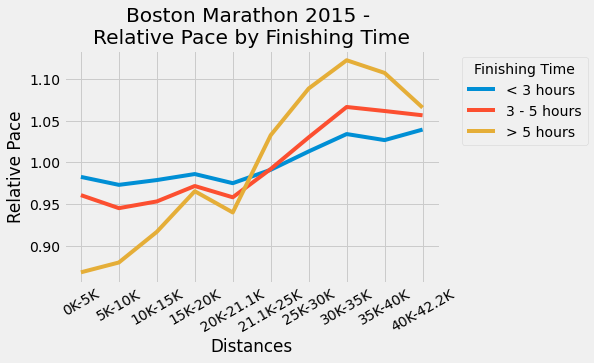

In [62]:
ax = dfSub3Pf.plot(kind='line', label = '< 3 hours')
ax2 = dfBet35Pf.plot(kind='line', label = '3 - 5 hours')
ax3 = dfOver5Pf.plot(kind='line', label = '> 5 hours')
plt.xticks(np.arange(10), list(dfSub3Pf.index), rotation = 30)
plt.ylabel('Relative Pace')
plt.title('Boston Marathon 2015 - \nRelative Pace by Finishing Time')
plt.legend(title='Finishing Time', bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

## Section 6 - Boston Marathon 2015 - Average Finish Times Per Age Group

In [63]:
filt = df15['M/F'] == 'M'
exactAge_grpM = df15[filt].groupby(['Age'])
mensAvg = df15.loc[filt, 'Official MTime'].mean()
filt = df15['M/F'] == 'F'
exactAge_grpF = df15[filt].groupby(['Age'])
wmnsAvg = df15.loc[filt, 'Official MTime'].mean()

print(f'Average time for a male finisher: {minsToTime(mensAvg)}')
print(f'Average time for a female finisher: {minsToTime(wmnsAvg)}')

Average time for a male finisher: 3:36:36
Average time for a female finisher: 3:58:22


In [64]:
exactAge_grpF.get_group(45)

,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,5K,10K,15K,20K,21.1K,25K,30K,35K,40K,Pace (mi/min),Proj Time,42.2K,Gender,Division,AgeCluster,QualifyTime,Official MTime,Qualify MTime
Overall,,,,,,,,,,,,,,,,,,,,,,,,,,,
627,F119,"Hunter-Galvan, Liza",45,F,San Antonio,TX,USA,NZL,NaN,0:18:54,0:38:10,0:57:37,1:17:18,1:21:33,1:36:53,1:57:08,2:17:43,2:37:40,0:06:22,-,2:46:44,21,1,45-49,3:53:58,166.733333,233.966667
1625,F107,"Glasson, Rachel L.",45,F,Lake Albert,NaN,AUS,NaN,NaN,0:20:03,0:40:20,1:00:42,1:21:04,1:25:28,1:41:32,2:02:32,2:24:13,2:45:50,0:06:42,-,2:55:22,82,5,45-49,3:53:58,175.366667,233.966667
2942,6776,"Bowley, Karolyn A",45,F,Middletown,RI,USA,NaN,NaN,0:21:00,0:41:55,1:02:50,1:24:06,1:28:46,1:45:23,2:07:20,2:29:40,2:51:42,0:06:56,-,3:01:30,168,7,45-49,3:53:58,181.500000,233.966667
5264,10766,"Roe, Lisa B",45,F,Angola,IN,USA,NaN,NaN,0:22:32,0:44:11,1:05:56,1:27:58,1:32:47,1:50:14,2:14:12,2:38:13,3:02:17,0:07:22,-,3:12:53,542,14,45-49,3:53:58,192.883333,233.966667
5791,9861,"Lynch, Sandra K.",45,F,Florence,AL,USA,NaN,NaN,0:22:35,0:44:29,1:06:57,1:29:50,1:34:45,1:53:02,2:16:49,2:41:11,3:04:37,0:07:27,-,3:14:57,685,22,45-49,3:53:58,194.950000,233.966667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26081,26695,"Wigle, Virginia M.",45,F,Santa Barbara,CA,USA,NaN,NaN,0:35:07,1:11:16,1:48:57,2:26:14,2:33:57,3:03:59,3:46:10,4:30:20,5:14:40,0:12:48,-,5:35:12,11721,1800,45-49,3:53:58,335.200000,233.966667
26172,26321,"Eneyni, Janice E.",45,F,Hanover,MA,USA,NaN,NaN,0:33:54,1:09:14,1:54:16,2:31:46,2:39:28,3:12:46,3:54:07,4:39:26,5:22:11,0:12:58,-,5:39:33,11775,1809,45-49,3:53:58,339.550000,233.966667
26326,28444,"Lynch, Pamela E.",45,F,El Macero,CA,USA,NaN,NaN,0:34:49,1:11:13,1:49:09,2:26:19,2:35:07,3:09:36,3:53:34,4:35:22,5:28:46,0:13:18,-,5:48:25,11870,1818,45-49,3:53:58,348.416667,233.966667


In [65]:
timeByAgeM = exactAge_grpM['Official MTime'].mean()
timeByAgeF = exactAge_grpF['Official MTime'].mean()
round(timeByAgeM, 2)

Age
18    227.30
19    217.25
20    199.07
21    207.56
22    204.26
       ...  
78    269.73
79    306.95
80    323.82
81    293.82
82    312.27
Name: Official MTime, Length: 65, dtype: float64

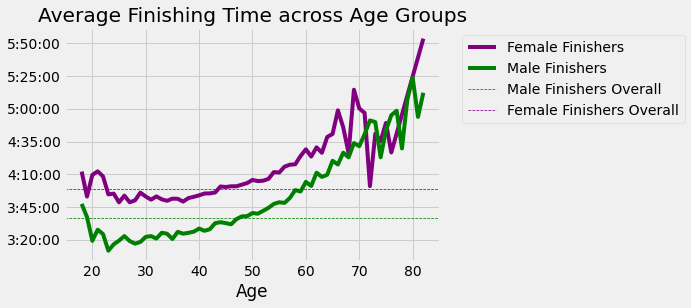

In [66]:
from matplotlib.ticker import FuncFormatter

def toStrTime(x, pos): # x refers to the value, pos refers to the position
    return minsToTime(x)

formatter = FuncFormatter(toStrTime)
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
plt.title('Average Finishing Time across Age Groups')
timeByAgeF.plot(kind='line', color='purple', label='Female Finishers')
timeByAgeM.plot(kind='line', color='green', label='Male Finishers')
plt.axhline(mensAvg, label='Male Finishers Overall', color='green', linestyle='--', linewidth=0.75)
plt.axhline(wmnsAvg, label='Female Finishers Overall', color='purple', linestyle='--', linewidth=0.75)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

## Predicting the finishing time of an Athlete given their performance up to the Half-Marathon

For the purposes of this model, we want to be able to predict the finishing time of an athlete given simple parameters such as as age, gender, and their splits at each checkpoint leading up to and including the half-marathon distance.

This idea was inspired by the Kaggle kernel here, which showcases a more indepth analysis on the same topic: https://bit.ly/3hEACwV
</b>

Note: the following is adapted from the TensorFlow Core documentation found here: https://bit.ly/3hJWHtY

In [67]:
# get the raw dataset
df15raw = df15.reset_index()

In [68]:
# copy the relevant testing data 
df15half = df15raw[['Age', 'M/F', '5K', '10K', '15K', '20K', '21.1K', '42.2K']].copy()
df15half

,Age,M/F,5K,10K,15K,20K,21.1K,42.2K
0,25,M,0:14:43,0:29:43,0:44:57,1:00:29,1:04:02,2:09:17
1,30,M,0:14:43,0:29:43,0:44:58,1:00:28,1:04:01,2:09:48
2,29,M,0:14:43,0:29:43,0:44:57,1:00:29,1:04:02,2:10:22
3,28,M,0:14:43,0:29:44,0:45:01,1:00:29,1:04:02,2:10:47
4,32,M,0:14:43,0:29:44,0:44:58,1:00:28,1:04:01,2:10:49
...,...,...,...,...,...,...,...,...
26593,64,F,0:50:15,1:43:31,2:36:53,3:32:26,3:43:46,7:38:56
26594,61,F,0:48:36,1:39:39,2:39:13,3:35:58,3:47:55,7:51:30
26595,66,F,0:53:03,1:47:16,2:41:45,3:37:07,3:48:21,7:59:33
26596,53,M,0:49:04,1:40:12,2:33:31,3:31:41,3:43:35,8:00:37


In [69]:
# convert each string minute time to a decimal minute time
for series in df15half[['5K', '10K', '15K', '20K', '21.1K', '42.2K']]:
    df15half[series] = df15half[series].apply(timeToMins)
df15half

,Age,M/F,5K,10K,15K,20K,21.1K,42.2K
0,25,M,14.716667,29.716667,44.950000,60.483333,64.033333,129.283333
1,30,M,14.716667,29.716667,44.966667,60.466667,64.016667,129.800000
2,29,M,14.716667,29.716667,44.950000,60.483333,64.033333,130.366667
3,28,M,14.716667,29.733333,45.016667,60.483333,64.033333,130.783333
4,32,M,14.716667,29.733333,44.966667,60.466667,64.016667,130.816667
...,...,...,...,...,...,...,...,...
26593,64,F,50.250000,103.516667,156.883333,212.433333,223.766667,458.933333
26594,61,F,48.600000,99.650000,159.216667,215.966667,227.916667,471.500000
26595,66,F,53.050000,107.266667,161.750000,217.116667,228.350000,479.550000
26596,53,M,49.066667,100.200000,153.516667,211.683333,223.583333,480.616667


In [70]:
# one-hot encode the genders of each of the runners
df15half = pd.get_dummies(df15half, prefix='', prefix_sep='')
df15half.tail()

,Age,5K,10K,15K,20K,21.1K,42.2K,F,M
26593,64,50.250000,103.516667,156.883333,212.433333,223.766667,458.933333,1,0
26594,61,48.600000,99.650000,159.216667,215.966667,227.916667,471.500000,1,0
26595,66,53.050000,107.266667,161.750000,217.116667,228.350000,479.550000,1,0
26596,53,49.066667,100.200000,153.516667,211.683333,223.583333,480.616667,0,1
26597,62,40.233333,88.300000,146.766667,208.683333,220.600000,486.016667,0,1


In [71]:
# checking if the decimal minute time can still be converted back to string minutes
# -> it can
minsToTime(df15half['42.2K'].iloc[-1])

'8:06:01'

In [72]:
print(df15half.isna().sum().sum()) # maximum number of rows to be removed
print(df15half.shape[0]) # total number of rows

258
26598


In [73]:
# remove any NA or NaN rows
df15half = df15half.dropna()

In [74]:
# grab a shuffled 80% sample of the dataframe as our training dataset
# assign the remaining rows to a testing datset
train_ds = df15half.sample(frac=0.8, random_state=0)
test_ds = df15half.drop(train_ds.index, axis=0)

In [75]:
train_ds

,Age,5K,10K,15K,20K,21.1K,42.2K,F,M
9830,52,23.833333,48.300000,71.916667,96.200000,101.483333,209.100000,0,1
7327,35,23.166667,47.050000,71.166667,95.233333,100.483333,201.283333,1,0
8869,48,24.616667,49.150000,73.666667,98.183333,103.500000,206.300000,1,0
11096,35,21.900000,44.033333,66.750000,90.516667,95.700000,213.016667,0,1
9842,52,24.450000,47.716667,71.766667,96.566667,101.950000,209.116667,0,1
...,...,...,...,...,...,...,...,...,...
7921,30,23.600000,46.316667,69.383333,92.866667,97.983333,203.266667,1,0
22989,53,28.283333,57.900000,87.366667,117.900000,124.750000,270.500000,1,0
15767,43,26.733333,52.933333,78.900000,105.283333,110.950000,227.983333,1,0
5281,46,22.050000,43.916667,65.766667,88.133333,93.050000,192.933333,0,1


In [76]:
# grab the statistics for our training dataset
# these statistics will be useful for Z-scoring below
train_stats = train_ds.describe()
train_stats.pop('42.2K')
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Age,21122.0,42.156614,11.272778,18.000000,33.000000,42.000000,50.000000,82.000000
5K,21122.0,25.532392,4.026089,14.716667,22.616667,24.966667,27.600000,53.050000
10K,21122.0,50.714865,7.936988,29.716667,45.033333,49.633333,54.883333,107.266667
15K,21122.0,76.190472,12.082137,44.950000,67.600000,74.450000,82.483333,161.750000
20K,21122.0,102.226168,16.589363,60.466667,90.554167,99.700000,110.629167,217.116667
21.1K,21122.0,107.868298,17.530918,64.016667,95.537500,105.200000,116.716667,228.350000
F,21122.0,0.453224,0.497819,0.000000,0.000000,0.000000,1.000000,1.000000
M,21122.0,0.546776,0.497819,0.000000,0.000000,1.000000,1.000000,1.000000


In [77]:
# pop out the label columns from our training and testing datsets
train_labels = train_ds.pop("42.2K")
test_labels = test_ds.pop("42.2K")

In [78]:
# function returns the Z-score for each of the datapoints
# Z-score normalization makes the model more resistant to skewing by units
# as well as exploding gradients
def normalize(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_ds = normalize(train_ds)
normed_test_ds = normalize(test_ds)

In [79]:
def build_model():
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=[len(train_ds.keys())]),
        layers.Dense(128, activation='relu'),
        layers.Dense(1)
    ])
    # Sequential mode with two densely connected input layers
    # with a rectified linear activation function
    
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    # optimizer that implements the RMSprop algorithm
    # learning rate = 0.001
    
    model.compile(loss='mse',
                 optimizer=optimizer,
                 metrics=['mae', 'mse'])
    
    return model

In [80]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1152      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 17,793
Trainable params: 17,793
Non-trainable params: 0
_________________________________________________________________


In [81]:
# train our model with early stopping to prevent overfitting

EPOCHS = 1000

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
# the patience parameter is the amount of epochs to check for improvement

history = model.fit(normed_train_ds, train_labels,
                    epochs=EPOCHS, validation_split=0.2,
                    verbose=0, callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:9281.1182,  mae:61.7687,  mse:9281.1182,  val_loss:188.5695,  val_mae:8.7502,  val_mse:188.5695,  
......................................

In [82]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

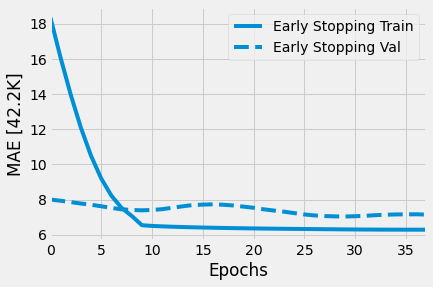

In [83]:
# View our model's performance by comparing training loss with
# validation loss

plotter.plot({'Early Stopping': history}, metric = 'mae')
plt.ylabel('MAE [42.2K]')
plt.show()

In [84]:
loss, mae, mse = model.evaluate(normed_test_ds, test_labels, verbose=2)

print("Testing dataset mean absolute error: {:5.2f} minutes".format(mae))

165/165 - 0s - loss: 145.6457 - mae: 7.5458 - mse: 145.6457
Testing dataset mean absolute error:  7.55 minutes


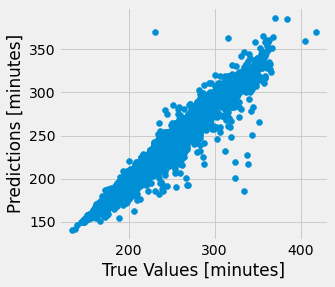

In [85]:
# plotting our predictions alongside true values to visualize the
# model's performance

test_predictions = model.predict(normed_test_ds).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [minutes]')
plt.ylabel('Predictions [minutes]')
plt.show()

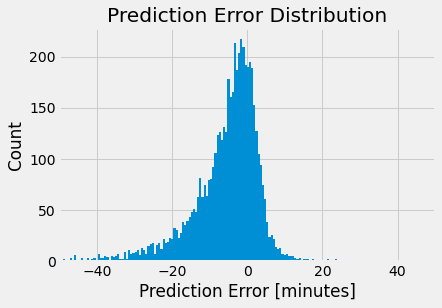

In [86]:
# view the prediction error distribution

error = test_predictions - test_labels
plt.hist(error, bins=500)
plt.xlabel("Prediction Error [minutes]")
plt.ylabel("Count")
plt.title("Prediction Error Distribution")
lims=[-50, 50]
plt.xlim(lims)
plt.show()

From what we can see from the Prediction Error Distribution, the histogram seems to be left-skewed. This indicates that the model is more likely to underestimate the the time a runner takes to complete the full 42.2K run. This is unsurprising since given the average relative pace profiles shown above, which range from [0.945-1.07] and [0.868-1.123] for the 3-5 hour finishers and the post-5 hour finishers respectively. Runners tend to start the race significantly under their average pace and finish significantly over. The '3-5 hour' and 'greater-than-5 hour' finishing cohorts make up more than 90% of the Boston Marathon participants. It is very likely the model encountered difficulties predicting the final times given the variability of running performance over the last 21.1K.

## Predicting the final marathon time given user-inputted features

Using the model created above, we can predict the finishing time of a runner given an age, gender, and their checkpoint splits up until the halfway marathon marker.

***Predict your final marathon time given your split times up to the half-marathon using the script below!***

In [87]:
import re

def numeric_fn(feature_list):
    timeRegex = re.compile(r'''((\d):(\d\d):(\d\d))''', re.VERBOSE)
    user_vals = []
    print('''
    Please input the following information. If your 
    answer is a time, please include your answer 
    in the form: "h:mm:ss" (e.g. 1:15:32)
    ''')
    for feature in feature_list:
        valid_feat = False
        while not valid_feat:
            val = input(feature + ': ')
            if feature != 'Age':
                if bool(timeRegex.search(val)):
                    val = timeToMins(val)
                    valid_feat = True
            elif val.isdigit():
                valid_feat = True
        user_vals.append(float(val))
    return user_vals
                
def get_gender(user_vals):
    boolean = {'M': [0, 1], 'F': [1, 0]}
    valid_feat = False
    while not valid_feat:
        val = input('Indicate "M" if you are male or "F" if you are female:')
        if val.isalpha() and len(val) < 2:
            valid_feat = True
    return user_vals + boolean[val.upper()]
        

def input_fn():
    numeric_features = list(train_ds.keys())[:-2]
    
    print('Final Marathon Time Predictor'.center(41, '-'))
    print('\n Predict your final marathon time given your split times up to the half-marathon!')
    
    userVals = numeric_fn(numeric_features)
    userVals = get_gender(userVals)
    
    return normalize(np.array(userVals)) # normalize returns a pd series object


test_predictions = model.predict(np.array([input_fn()])) 
# model.predict() expects a 2-D array with the inner array having a length of 8
print(f'\nYour predicted marathon finishing time is: {minsToTime(test_predictions[0][0])}')
# test_predictions is a 2-D array with an inner array of length 1

------Final Marathon Time Predictor------

 Predict your final marathon time given your split times up to the half-marathon!

    Please input the following information. If your 
    answer is a time, please include your answer 
    in the form: "h:mm:ss" (e.g. 1:15:32)
    
Age: 32
5K: 0:24:48
10K: 0:49:16
15K: 1:15:32
20K: 1:44:31
21.1K: 1:50:27
Indicate "M" if you are male or "F" if you are female:F

Your predicted marathon finishing time is: 4:03:37


## References:
* https://www.wired.com/story/how-the-boston-marathon-messes-with-runners-to-slow-them-down/
* https://www.runnersworld.com/races-places/a20783312/is-the-boston-marathons-heartbreak-hill-as-bad-as-they-say/
* https://findmymarathon.com/weather-detail.php?zname=Boston%20Marathon&year=2015
* https://medium.com/@ade3/why-is-the-boston-marathon-so-slow-6f8512129e24